In [3]:
!pip install tensorflow

In [5]:
import numpy as np
import gzip
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from google.colab import drive

In [7]:
drive.mount('/content/drive')

def load_images(images_path):
    with gzip.open(images_path, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, 28, 28, 1)
    return images

def load_labels(labels_path):
    with gzip.open(labels_path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

train_images_path = '/content/drive/My Drive/train-images-idx3-ubyte.gz'
train_labels_path = '/content/drive/My Drive/train-labels-idx1-ubyte.gz'
test_images_path = '/content/drive/My Drive/t10k-images-idx3-ubyte.gz'
test_labels_path = '/content/drive/My Drive/t10k-labels-idx1-ubyte.gz'

train_images = load_images(train_images_path)
train_labels = load_labels(train_labels_path)
test_images = load_images(test_images_path)
test_labels = load_labels(test_labels_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.6805 - loss: 0.8822 - val_accuracy: 0.8543 - val_loss: 0.3974
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 81ms/step - accuracy: 0.8446 - loss: 0.4335 - val_accuracy: 0.8744 - val_loss: 0.3416
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 57ms/step - accuracy: 0.8691 - loss: 0.3628 - val_accuracy: 0.8782 - val_loss: 0.3190
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.8769 - loss: 0.3418 - val_accuracy: 0.8883 - val_loss: 0.2958
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 60ms/step - accuracy: 0.8855 - loss: 0.3088 - val_accuracy: 0.8963 - val_loss: 0.2737
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8963 - loss: 0.2868 - val_accuracy: 0.9032 - val_loss: 0.2611
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.9033 - loss: 0.2696 - val_accuracy: 0.9081 - val_loss: 0.2507
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9100 - loss: 0.2483 - 

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 2s - 7ms/step - accuracy: 0.8992 - loss: 0.2759
Test accuracy: 0.8992000222206116


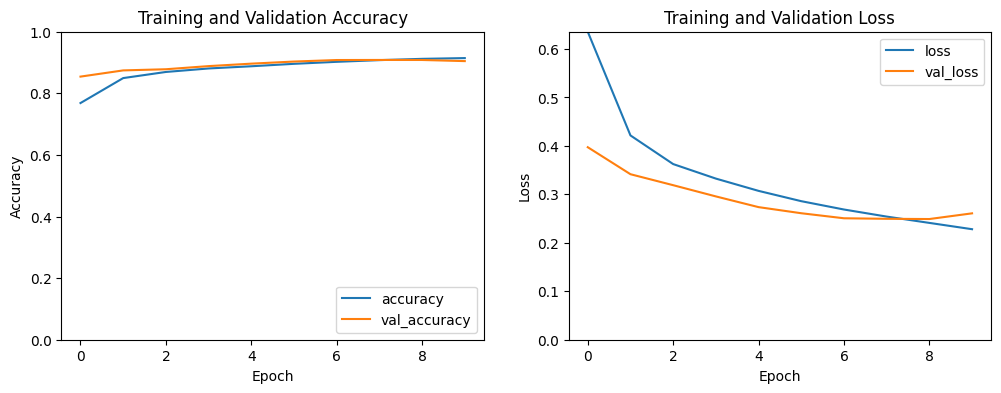

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(history.history['loss'])])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


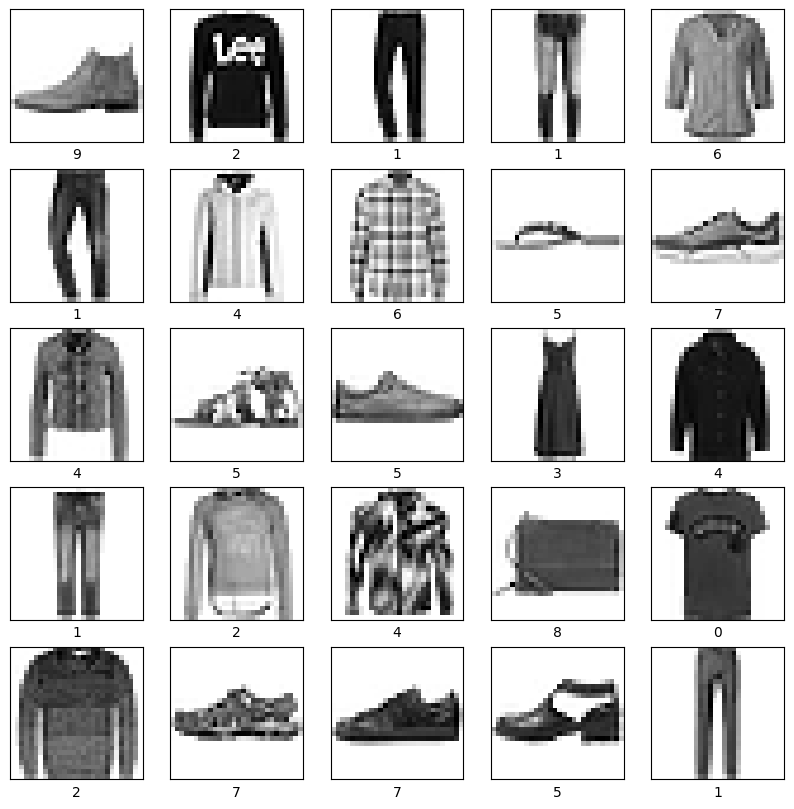

In [15]:
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()

In [16]:
model.save('fashion_mnist_cnn_model.h5')

### Частина 2

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from google.colab import drive
import gzip

In [18]:
drive.mount('/content/drive')

def load_images(images_path):
    with gzip.open(images_path, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, 28, 28, 1)
    return images

def load_labels(labels_path):
    with gzip.open(labels_path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

train_images_path = '/content/drive/My Drive/train-images-idx3-ubyte.gz'
train_labels_path = '/content/drive/My Drive/train-labels-idx1-ubyte.gz'
test_images_path = '/content/drive/My Drive/t10k-images-idx3-ubyte.gz'
test_labels_path = '/content/drive/My Drive/t10k-labels-idx1-ubyte.gz'

train_images = load_images(train_images_path)
train_labels = load_labels(train_labels_path)
test_images = load_images(test_images_path)
test_labels = load_labels(test_labels_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [21]:
train_images = np.repeat(train_images, 3, axis=-1)
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')
test_images = np.repeat(test_images, 3, axis=-1)
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')

In [32]:
train_images_vgg = preprocess_input(train_images)
test_images_vgg = preprocess_input(test_images)

In [33]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images_vgg)

In [36]:
history = model.fit(datagen.flow(train_images_vgg, train_labels, batch_size=64),
                    epochs=10,
                    validation_data=(test_images_vgg, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 827s 880ms/step - accuracy: 0.1045 - loss: 4.9815 - val_accuracy: 0.1000 - val_loss: 2.2872
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 849s 866ms/step - accuracy: 0.1280 - loss: 2.2726 - val_accuracy: 0.2244 - val_loss: 2.1475
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 894s 900ms/step - accuracy: 0.1536 - loss: 2.2033 - val_accuracy: 0.2320 - val_loss: 2.0797
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 812s 865ms/step - accuracy: 0.1607 - loss: 2.1883 - val_accuracy: 0.2189 - val_loss: 2.0351
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 899s 905ms/step - accuracy: 0.1650 - loss: 2.1770 - val_accuracy: 0.2541 - val_loss: 2.0314
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 861s 904ms/step - accuracy: 0.1646 - loss: 2.1760 - val_accuracy: 0.2344 - val_loss: 2.0082
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 826s 865ms/step - accuracy: 0.1608 - loss: 2.1727 - val_accuracy: 0.2398 - val_loss: 2.0026
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 861s 864ms/step - accuracy: 0.1657 - loss: 2.16

In [37]:
test_loss, test_acc = model.evaluate(test_images_vgg, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 115s - 368ms/step - accuracy: 0.2511 - loss: 1.9994
Test accuracy: 0.25110000371932983


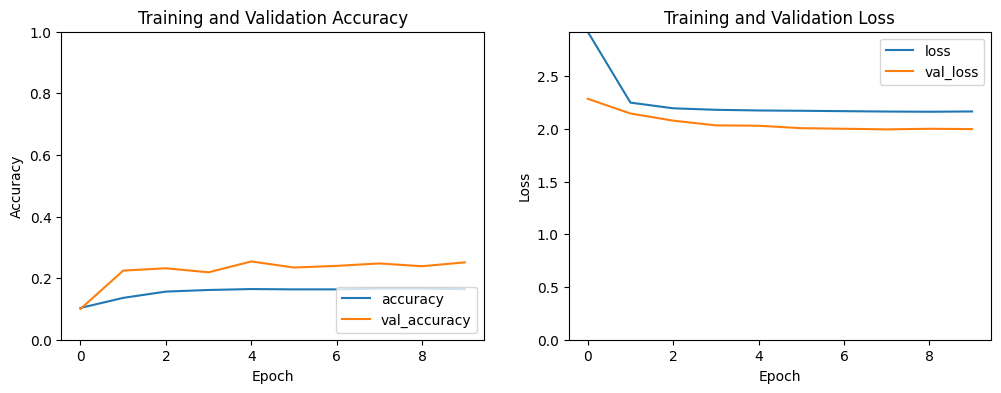

In [38]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(history.history['loss'])])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 117s 372ms/step


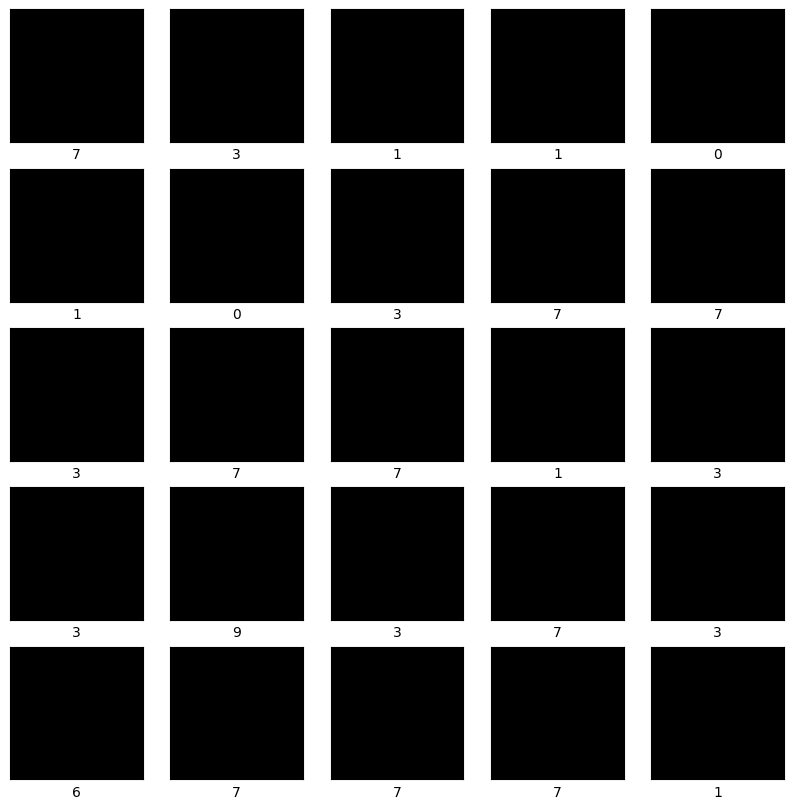

In [39]:
predictions = model.predict(test_images_vgg)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(np.argmax(predictions[i]))
plt.show()

In [40]:
model.save('fashion_mnist_vgg16_model.h5')